<a href="https://colab.research.google.com/github/claralga/Projet-Python-2A/blob/main/Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ça part les cocottes !!!!**

# scrapping

In [ ]:
from requests import get
from bs4 import BeautifulSoup
import numpy as np, pandas as pd

In [ ]:
#Création d'un tableau qui va permettre de faire tourner la boucle et de passer à la page suivante tous les 50 films
pages = np.arange(1, 10051, 50)

Films = []
Années = []
Catégories = []
Genres = []
Durées = []
Scores_imdb = []
Values=[]
Votes = []
CA = []
Metascores=[]
Réalisateurs = []


#On scrape 50 films par page puis il faut changer de page grâce à cette boucle 
for page in pages:
    
    #Récupération de l'url. Sur la page web, on remarque que l'url change après le "start" lorsque l'on passe aux pages suivantes
    R = get("https://www.imdb.com/search/title/?sort=num_votes,desc&" 
                   + "start=" 
                   + str(page) 
                   + "&title_type=feature&year=1950,2020")
    
    #Utilisation du package BeautifulSoup afin de se repérer dans la page html
    Page = BeautifulSoup(R.text, 'html.parser')
    
    #Repérage du balisage à chaque film afin de les prendre un par un dans la prochaine boucle
    Concat_films = Page.find_all('div', class_= 'lister-item mode-advanced')

    #Pour chaque film, on repère le balisage des informations voulues et on les stocke 
    for film in Concat_films:
    
        if film.find('div', class_ = 'ratings-metascore') is not None:
        
           #Titre
            Titre = film.h3.a.text
            Films.append(Titre)
        
           #Année de sortie 
            Année = film.h3.find('span', class_= 'lister-item-year text-muted unbold').text
            Années.append(Année)
        
           #Catégorie
            if film.p.find('span', class_ = 'certificate') is not None: 
                Catégorie = film.p.find('span', class_= 'certificate').text
                Catégories.append(Catégorie)
            else:
                Catégories.append('NaN')
     
            #Réalisateur 
            if film.find("p", class_="") is not None:
                Noms = film.find("p", class_="")
                Noms = Noms.text.replace("\n","").split('|')
                Noms = [x.strip() for x in Noms]
                Noms = [Noms[i].replace(j, "") for i,j in enumerate(["Director:"])]
                Réalisateurs.append(Noms[0])
            else : 
                Réalisateurs.append('NaN')

            
            #Genre
            Genre = film.find('span', class_ = 'genre').text
            Genres.append(Genre)

            #Durée
            if film.p.find('span', class_ = 'runtime') is not None: 
                Durée = film.p.find('span', class_ = 'runtime').text
                Durées.append(Durée)
            else:
                Durées.append('NaN')

            #Score public IMDB
            imdb = float(film.strong.text)
            Scores_imdb.append(imdb)

            #Metascore
            Metascore = film.find('span', class_ = 'metascore').text
            Metascores.append(int(Metascore))


            #Nombre de votes sur le site IMDB
            Film_values = film.find_all('span', attrs = {'name':'nv'})
            del Values[:]

            if len(Film_values)==2:
                for value in range(2) :
                    Values.append(Film_values[value]['data-value'])
                Votes.append(int(Values[0]))
                CA.append(Values[1])
            elif len(Film_values)==1:
                Votes.append(int(Film_values[0]['data-value'][0]))
                CA.append('NaN')
            else :
                Votes.append('NaN')
                CA.append('NaN')

# Nettoyage et mise en forme de la base de données

In [ ]:
df = pd.DataFrame({'Film': Films,
                       'Année': Années,
                       'Catégorie': Catégories,
                       'Genre': Genres,
                       'Réalisateur': Réalisateurs,
                       'Durée (min)': Durées,
                       'Metascore': Metascores,
                       'Score imdb': Scores_imdb,
                       'Nb votes': Votes,
                       'CA($)': CA})

df.loc[:, 'Année'] = df['Année'].str[-5:-1].astype(int)

df['Score imdb'] = df['Score imdb'] * 10

df['Réalisateur'] = df['Réalisateur'].apply(lambda x: x.replace("Directors:", ""))

df['Durée (min)'] = df['Durée (min)'].apply(lambda x: x.replace(" min", "")).apply(lambda x: int(x))

df['Genre'] = df['Genre'].apply(lambda x: x.replace("\n", ""))

df['CA($)']=df['CA($)'].str.replace(',', '')


NameError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df = pd.read_csv('DFscrap.csv')
df

,Film,Année,Catégorie,Genre,Réalisateur,Durée (min),Metascore,Score imdb,Nb votes,CA($)
0,Les évadés,1994,Tous publics,Drama,Frank Darabont,142,80,93.0,2304536,28341469.0
1,The Dark Knight: Le chevalier noir,2008,Tous publics,"Action, Crime, Drama",Christopher Nolan,152,84,90.0,2268016,534858444.0
2,Inception,2010,Tous publics,"Action, Adventure, Sci-Fi",Christopher Nolan,148,74,88.0,2030088,292576195.0
3,Fight Club,1999,16,Drama,David Fincher,139,66,88.0,1826348,37030102.0
4,Pulp Fiction,1994,12,"Crime, Drama",Quentin Tarantino,154,94,89.0,1798923,107928762.0
...,...,...,...,...,...,...,...,...,...,...
7690,Braveheart,1995,Tous publics,"Biography, Drama, History",Mel Gibson,178,68,83.0,948717,75600000.0
7691,Le monde de Nemo,2003,Tous publics,"Animation, Adventure, Comedy","Andrew Stanton, Lee Unkrich",100,90,81.0,936600,380843261.0
7692,Le retour du Jedi,1983,Tous publics,"Action, Adventure, Fantasy",Richard Marquand,131,58,83.0,936428,309125409.0
7693,Iron Man,2008,Tous publics,"Action, Adventure, Sci-Fi",Jon Favreau,126,79,79.0,927922,318412101.0


# Représentations graphiques et analyse

On commence par importer les modules utiles et à charger la table de données crée. On peut afficher cette table de données afin de visualiser plus nettement sa forme et ses colonnes.

Nous allons commencer par effectuer quelques statistiques descriptives et des analyses graphiques. Pour ceci, on importe les modules matplotlib et seaborn.

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

On représente ci-dessous simultanément la répartition des critiques des spectateurs avec celles des média pour chaque film. 


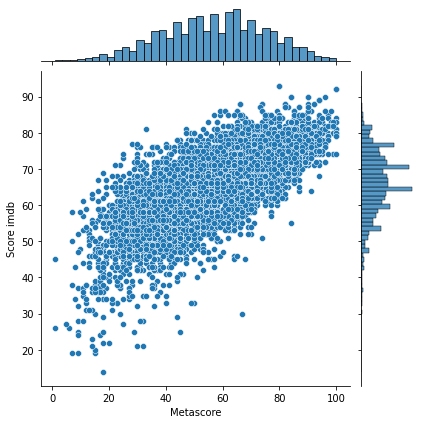

In [ ]:
Critiques = sns.jointplot(data=df, x='Metascore', y='Score imdb')

On remarque une forte concentration autour d'une droite. On peut déduire de ce graphe qu'il y a une certains cohérence entre l'avis des spectateurs et des critiques.
Cependant on remarque qu'en général les spectateurs donnent de meilleures notes que les critiques. 



On peut maintenant essayer de mettre en avant un lien entre le succès d'un film et son chiffre d'affaire. 
Représentons dans un graphe le succès des films auprès des critiques et leur chiffre d'affaires. 

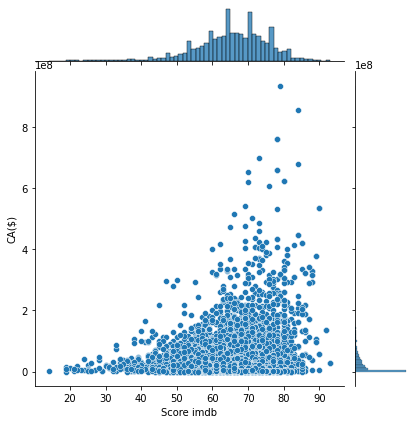

In [ ]:
Avis_CA = sns.jointplot(data=df, x='Score imdb', y="CA($)")

De manière assez évidente, ce graphe nous montre que les films avec le plus gros chiffres d'affaires sont aussi les mieux notés par les spectateurs. 


On peut aussi mettre en avant un lien entre le chiffre d'affaire et les critiques des media ("des professionnels"). 

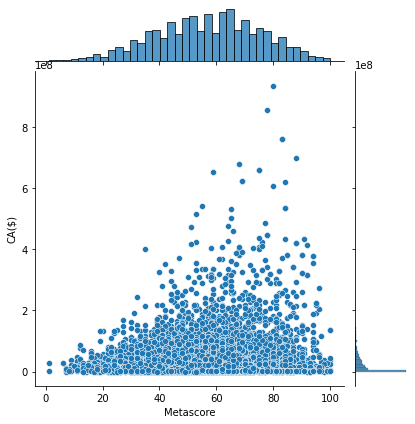

In [ ]:
Critiques_CA = sns.jointplot(data=df, x='Metascore', y="CA($)") 

Le lien quand on s'intéresse à l'avis des critiques professionnels est moins clair. En effet, des films très bien notés par ces derniers n'ont pas toujours un chiffre d'affaire considérable, tandis que certains films moins bien notés selon les critiques semblent eux avoir récolté un chiffre d'affaire très important. 




Cette différence entre les avis des spectacteurs et ceux des critiques nous suggèrent de s'intéresser à la forme de leur distribution. 


Le premier graphe que nous avons représenté nous suggère que les spectateurs sont plus indulgents généralement avec les films : pour un film fixé, les avis seront globalement plus positifs et les notes des spectateurs plus élevées que les avis des critiques. On peut aussi s'intéresser à l'écart-type de ces avis : les avis des spectateurs sont-ils plus hétérogènes que ceux des critiques ? 

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


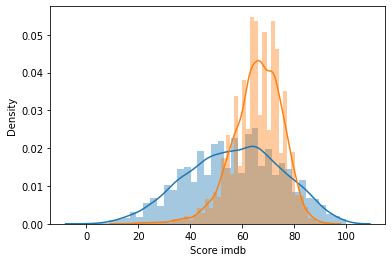

In [ ]:
sns.distplot(df.Metascore)
sns.distplot(df['Score imdb'])

On réunit sur un même graphe la répartition des notes des spectateurs avec celle des critiques. En bleu se trouve la répartition des notes des critiques et en orange celle des notes des spectateurs. 

On retrouve le fait que les spectateurs donnent en moyenne des meilleures notes que les critiques, mais les écarts-types sont bien différents : les notes des spectateurs sont finalement plus semblables entre elles tandis que les avis des critiques semblent plus hétérogènes (les écarts à la moyenne sont en moyenne plus grands). 

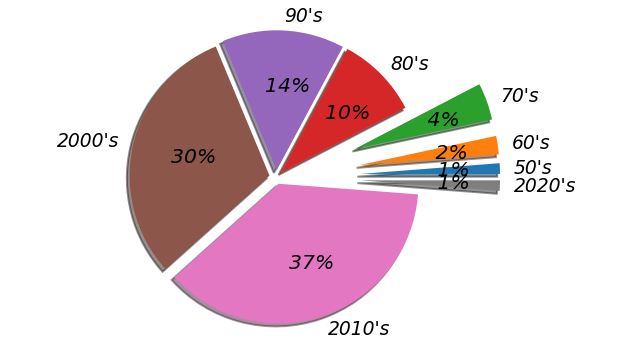

In [ ]:
df['Décennie'] = df['Année'].apply(lambda x:((x-1900)//10)*10)
def Stat(gr):
    return {'min':gr.min(),'max':gr.max(),'nombre': gr.count(),'moyenne':gr.mean()}


test = df['Année'].groupby(df['Décennie']).apply(Stat).unstack()
sns.set_context("poster", font_scale=0.85)


def Label(s):
    val = (1900 + s, s)[s < 100]
    chaine = '' if s < 50 else "{}'s".format(int(val))
    return chaine
plt.rc('font', weight='medium', family='Arial', style='oblique')

plt.subplots(figsize=(11, 6))
labels = [Label(s) for s in  test.index]
sizes  = test['nombre'].values
explode = [0.6 if sizes[i] < 400 else 0.05 for i in range(8)]
plt.pie(sizes, explode = explode, labels=labels,
       autopct = lambda x:'{:4.0f}%'.format(x) if x > 1 else '',
       shadow=True, startangle=0)
plt.axis('equal')
#ax.set_title('% de films par décennie', bbox={'facecolor':'w', 'pad':0.5},color='k', fontsize=20);
df.drop('Décennie', axis=1, inplace = True)

Ce diagramme nous montre la répartition dans le temps des films sur lesquels nous disposons des informations. On remarque que la majorité des films sur lesquels nous avons des données sont sortis entre 2000 et 2019. 

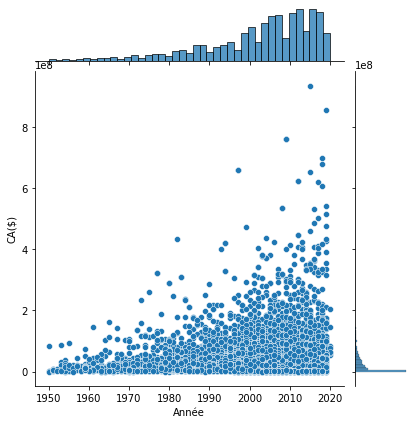

In [ ]:
evolution = sns.jointplot(data=df, x='Année', y="CA($)")

Regarder si les films qui ont gagné le + avant les années 2000 sont moins bien notés ? 

In [ ]:
df_film = df.set_index('Film')
print(df_film['CA($)'].max())
print(df_film['CA($)'].idxmax())

df_annee = df.set_index('Année')
df_annee

936662225.0
Star Wars: Épisode VII - Le Réveil de la Force


,Film,Catégorie,Genre,Réalisateur,Durée (min),Metascore,Score imdb,Nb votes,CA($)
Année,,,,,,,,,
1994,Les évadés,Tous publics,Drama,Frank Darabont,142,80,93.0,2304536,28341469.0
2008,The Dark Knight: Le chevalier noir,Tous publics,"Action, Crime, Drama",Christopher Nolan,152,84,90.0,2268016,534858444.0
2010,Inception,Tous publics,"Action, Adventure, Sci-Fi",Christopher Nolan,148,74,88.0,2030088,292576195.0
1999,Fight Club,16,Drama,David Fincher,139,66,88.0,1826348,37030102.0
1994,Pulp Fiction,12,"Crime, Drama",Quentin Tarantino,154,94,89.0,1798923,107928762.0
...,...,...,...,...,...,...,...,...,...
1995,Braveheart,Tous publics,"Biography, Drama, History",Mel Gibson,178,68,83.0,948717,75600000.0
2003,Le monde de Nemo,Tous publics,"Animation, Adventure, Comedy","Andrew Stanton, Lee Unkrich",100,90,81.0,936600,380843261.0
1983,Le retour du Jedi,Tous publics,"Action, Adventure, Fantasy",Richard Marquand,131,58,83.0,936428,309125409.0


Regrouper les chiffres d'affaire par réalisateur ?

In [ ]:
# Moyenne des chiffres d'affaires pour chaque réalisateur 

tableau_realisateur = df["Réalisateur"].unique()
len(tableau_realisateur)
tableau_realisateur
type(tableau_realisateur)
R = list(tableau_realisateur)


# Programme qui permet d'afficher les films d'1 seul réalisateur

def groupe_réalisateur(i) :
  df_bis = df[df['Réalisateur'] == i]
  return df_bis

# Fais la moyenne des chiffres d'affaires pour un seul réalisateur

def chiffre_affaire_moyen(i) :
  return groupe_réalisateur(i)['CA($)'].mean()

# On crée la liste des moyennes des chiffres d'affaire pour chaque réalisateur 

L = []
for i in tableau_realisateur :
  L.append(chiffre_affaire_moyen(i))

def metascore_moyen(i) :
  return groupe_réalisateur(i)['Metascore'].mean()

M = []
for i in tableau_realisateur:
  M.append(metascore_moyen(i))

def Score_public_moyen(i) :
  return groupe_réalisateur(i)['Score imdb'].mean()

S = []
for i in tableau_realisateur:
  S.append(Score_public_moyen(i))

# On crée le tableau avec les réalisateurs et leur chiffre d'affaire moyen sur l'ensemble de leurs films

data = [R,L,M,S]
index = ['Réalisateur','Chiffre d affaire moyen','Metascore moyen','Score public moyen']
df_rea_CAmoyen = (pd.DataFrame(data=data,index=index)).T
rea_CAmoyen_trie = df_rea_CAmoyen.sort_values(by=['Chiffre d affaire moyen'],ascending=False)
VRAI = rea_CAmoyen_trie.dropna()
VRAI




,Réalisateur,Chiffre d affaire moyen,Metascore moyen,Score public moyen
348,"Andrew Stanton, Angus MacLane",4.86296e+08,77,73
111,"Chris Buck, Jennifer Lee",4.39056e+08,69.5,71.5
178,"Andrew Adamson, Kelly Asbury, Conrad Vernon",4.36471e+08,75,72
435,Josh Cooley,4.34038e+08,84,78
28,"Roger Allers, Rob Minkoff",4.22784e+08,88,85
...,...,...,...,...
2911,Dermot Mulroney,1378,13,49
1939,Sergio G. Sánchez,1377,63,67
3116,Ekachai Uekrongtham,1242,39,56
3089,Mikkel Brænne Sandemose,1228,52,59


Est-ce que certains réalisateurs font en majorité certains genres de films ?



In [ ]:
R = list(df["Réalisateur"].unique())
def groupe_réalisateur(i) :
  df_bis = df[df['Réalisateur'] == i]
  return df_bis

def genres(i) :
  L = []
  L.append(groupe_réalisateur(i)['Genre'])
  return L



[1            Action, Crime, Drama            
 2       Action, Adventure, Sci-Fi            
 10              Action, Adventure            
 11       Adventure, Drama, Sci-Fi            
 16              Action, Adventure            
 24         Drama, Mystery, Sci-Fi            
 29              Mystery, Thriller            
 189        Action, Drama, History            
 580      Drama, Mystery, Thriller            
 1282               Action, Sci-Fi            
 2116     Crime, Mystery, Thriller            
 7646         Action, Crime, Drama            
 7647    Action, Adventure, Sci-Fi            
 7655            Action, Adventure            
 7656     Adventure, Drama, Sci-Fi            
 7661            Action, Adventure            
 7669       Drama, Mystery, Sci-Fi            
 7674            Mystery, Thriller            
 Name: Genre, dtype: object]

# Quels genres de film retrouvent-ont le plus ?


In [ ]:
Mots = ['Drama', 'Comedy','Action','Thriller','Adventure','Biography','Sci-Fi','Fantasy','History','Animation']


In [ ]:
def one_hot_genre (df, mots):
    
    A = df.copy()
    
    # Crée de nouvelles colonnes qui serviront pour le 1 hot encoding des genres
    for mot in mots:
        df[mot] = 0 # Initilise à 0 pour tous les genres
    A['Indéfini'] = 0
        
    # On parcourt ensuite les lignes du dataframe et on vérifie la présence de chaque genre 
    
    for index, genre in enumerate(df.Genre):
    
        indefini = True
        if type(genre) == str :
            for mot in mots :
                if mot in genre :
                    indefini = False
                    df.loc[index, mot] = 1
        elif indefini :
            df.loc[index, 'Indéfini'] = 1
    
    return df

In [ ]:
df_Genre_oneHot = one_hot_genre(df, Mots)

In [ ]:
def check_oneHot (df, mots):
    for mot in Mots:
        print("###########%s" % mot)
        df_temp = df[df[mot] == 1]
        for genre in df_temp.Genre:
            print(genre)
            print(' ')
  

In [ ]:
#check_oneHot(df_Genre_oneHot, Mots+['Indéfini'])

In [ ]:
Full= df_Genre_oneHot.merge(VRAI, on ='Réalisateur')
df_sum = Full[(Mots)]

s=df_sum.sum(axis = 0, skipna = True)
s.sort_values(ascending = False)

Drama        4087
Comedy       2753
Action       1706
Adventure    1283
Thriller     1182
Fantasy       582
Biography     534
Sci-Fi        523
Animation     330
History       242
dtype: int64

(-1.243537821684883,
 1.8379153532847199,
 -1.5523351161239853,
 1.220610558995948)

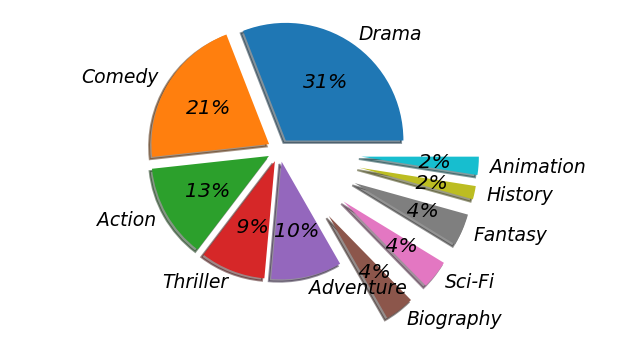

In [ ]:
plt.rc('font', weight='medium', family='Calibri', style='oblique')
plt.subplots(figsize=(11, 6))

labels=Mots
explode = 0.4*np.ones(10).T
explode1= [0.7 if s[i] < 600 else 0.1 for i in range(10)]
plt.pie(s, explode=explode1, labels=labels,
       autopct = lambda x:'{:2.0f}%'.format(x) if x > 1 else '',
       shadow=True)
plt.axis('equal')